## Modelling the interval of Low and High with VARIMAX

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

Load datasets

In [24]:
monthly_M2_SP = pd.read_csv('./data/monthly_M2_SP.csv')
monthly_M2_SP['Date'] =  pd.to_datetime(monthly_M2_SP['Date'], format='%Y-%m-%d')
monthly_M2_SP.set_index('Date', inplace=True)
monthly_M2_SP

,Open,High,Low,Close,Volume,M2NS
Date,,,,,,
1980-11-01,127.47,141.96,127.23,140.52,5.489500e+08,1599.0
1980-12-01,140.52,140.66,125.32,135.76,5.698056e+08,1604.8
1981-01-01,135.76,140.32,128.57,129.55,5.308444e+08,1610.6
1981-02-01,129.48,132.02,124.66,131.27,4.535056e+08,1610.5
1981-03-01,131.27,138.38,128.56,136.00,6.525167e+08,1633.2
...,...,...,...,...,...,...
2022-10-01,3609.78,3905.42,3491.58,3871.98,5.678654e+10,21380.1
2022-11-01,3901.79,4080.11,3698.15,4080.11,5.230904e+10,21378.7
2022-12-01,4087.14,4100.96,3764.49,3839.50,4.845613e+10,21400.0


## Seasonality

<Axes: xlabel='Date'>

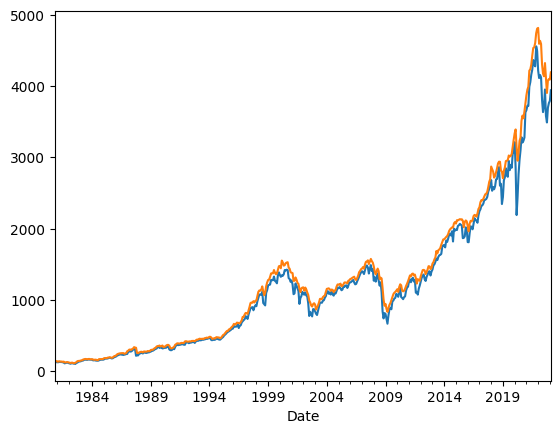

In [25]:
monthly_M2_SP['Low'].plot()
monthly_M2_SP['High'].plot()

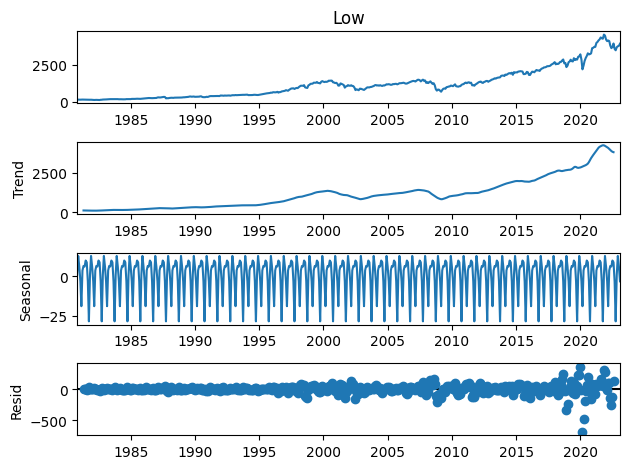

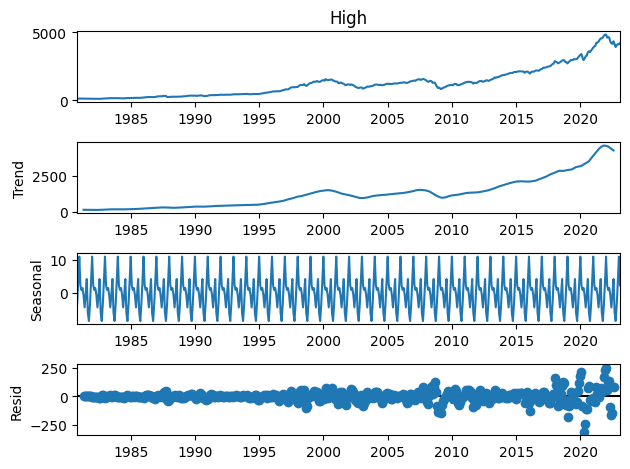

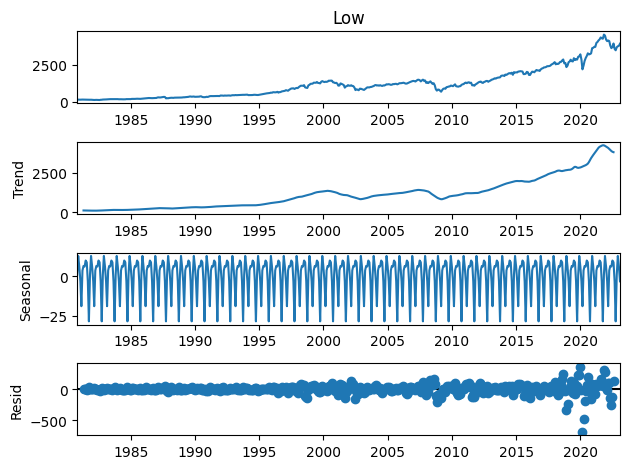

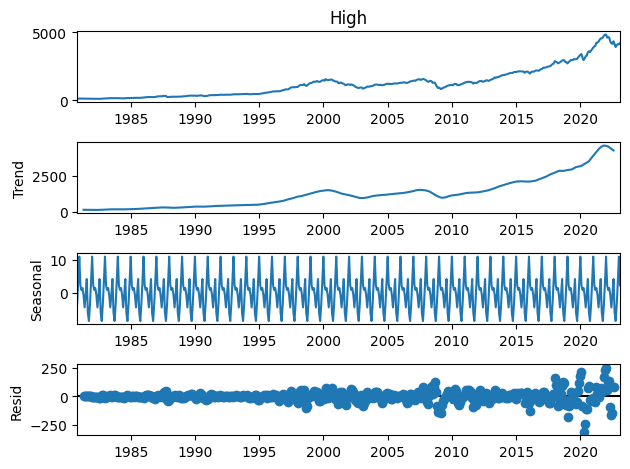

In [29]:
display(sm.tsa.seasonal_decompose(monthly_M2_SP['Low'],model='additive').plot())
display(sm.tsa.seasonal_decompose(monthly_M2_SP['High'],model='additive').plot())
# sm.tsa.seasonal_decompose(monthly_M2_SP['Low'],model='additive').seasonal.plot()

# Stationarity

In [34]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [31]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

# Low series

In [57]:
adf_test(monthly_M2_SP['Low'])
kpss_test(monthly_M2_SP['Low'])

Results of Dickey-Fuller Test:
Test Statistic                   1.516401
p-value                          0.997584
#Lags Used                      15.000000
Number of Observations Used    487.000000
Critical Value (1%)             -3.443849
Critical Value (5%)             -2.867493
Critical Value (10%)            -2.569941
dtype: float64
Results of KPSS Test:
Test Statistic            3.151212
p-value                   0.010000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Basic series non-stationary

## Log and diff

<Axes: xlabel='Date'>

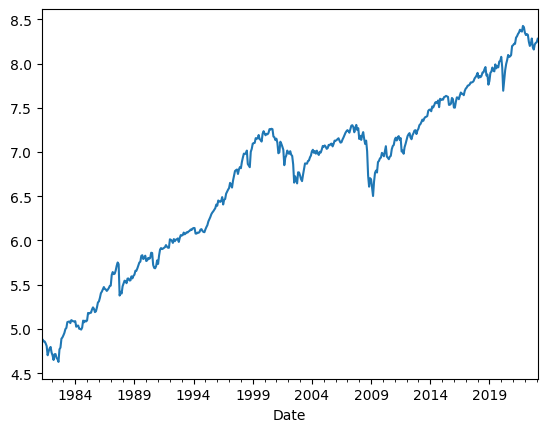

In [52]:
monthly_M2_SP['lnLow'] = np.log(monthly_M2_SP['Low'])
monthly_M2_SP.dropna(inplace=True)
monthly_M2_SP['lnLow'].plot()

In [54]:
adf_test(monthly_M2_SP['lnLow'])
kpss_test(monthly_M2_SP['lnLow'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.994405
p-value                          0.755299
#Lags Used                       3.000000
Number of Observations Used    500.000000
Critical Value (1%)             -3.443496
Critical Value (5%)             -2.867338
Critical Value (10%)            -2.569858
dtype: float64
Results of KPSS Test:
Test Statistic            3.382296
p-value                   0.010000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Both tests show non-stationarity

<Axes: xlabel='Date'>

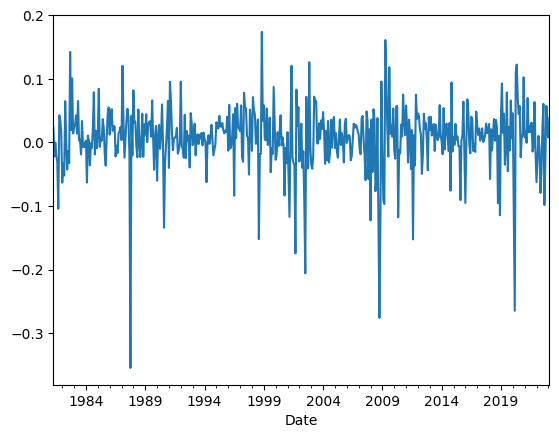

In [55]:
monthly_M2_SP['lnLow_diff1'] = monthly_M2_SP['lnLow']- monthly_M2_SP['lnLow'].shift(1)
monthly_M2_SP.dropna(inplace=True)
monthly_M2_SP['lnLow_diff1'].plot()

In [56]:
adf_test(monthly_M2_SP['lnLow_diff1'])
kpss_test(monthly_M2_SP['lnLow_diff1'])

Results of Dickey-Fuller Test:
Test Statistic                -1.437454e+01
p-value                        9.372382e-27
#Lags Used                     2.000000e+00
Number of Observations Used    5.000000e+02
Critical Value (1%)           -3.443496e+00
Critical Value (5%)           -2.867338e+00
Critical Value (10%)          -2.569858e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.071712
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests show stationarity

## Diff once

<Axes: xlabel='Date'>

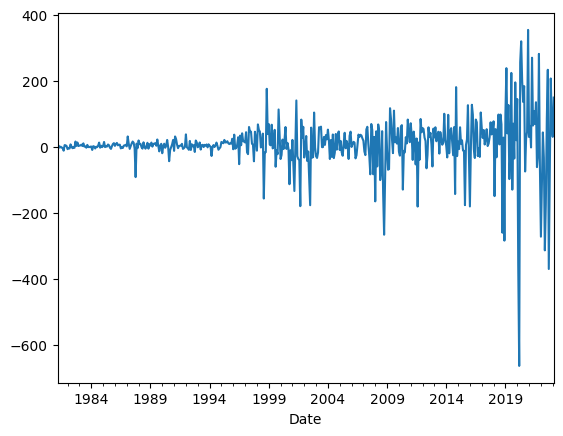

In [50]:
monthly_M2_SP['Low_diff1'] = monthly_M2_SP['Low']- monthly_M2_SP['Low'].shift(1)
monthly_M2_SP.dropna(inplace=True)
monthly_M2_SP['Low_diff1'].plot()

In [51]:
adf_test(monthly_M2_SP['Low_diff1'])
kpss_test(monthly_M2_SP['Low_diff1'])

Results of Dickey-Fuller Test:
Test Statistic                -5.788528e+00
p-value                        4.934180e-07
#Lags Used                     1.400000e+01
Number of Observations Used    4.890000e+02
Critical Value (1%)           -3.443794e+00
Critical Value (5%)           -2.867469e+00
Critical Value (10%)          -2.569928e+00
dtype: float64
Results of KPSS Test:
Test Statistic            0.330752
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# High series

In [58]:
adf_test(monthly_M2_SP['High'])
kpss_test(monthly_M2_SP['High'])

Results of Dickey-Fuller Test:
Test Statistic                   2.022852
p-value                          0.998702
#Lags Used                      17.000000
Number of Observations Used    485.000000
Critical Value (1%)             -3.443905
Critical Value (5%)             -2.867518
Critical Value (10%)            -2.569954
dtype: float64
Results of KPSS Test:
Test Statistic            3.124359
p-value                   0.010000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Base series non-stationary

## Log and Diff

<Axes: xlabel='Date'>

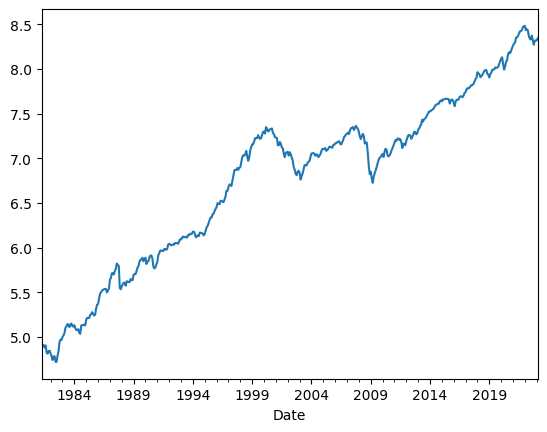

In [59]:
monthly_M2_SP['lnHigh'] = np.log(monthly_M2_SP['High'])
monthly_M2_SP.dropna(inplace=True)
monthly_M2_SP['lnHigh'].plot()

In [60]:
adf_test(monthly_M2_SP['lnLow'])
kpss_test(monthly_M2_SP['lnLow'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.046941
p-value                          0.735761
#Lags Used                       3.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64
Results of KPSS Test:
Test Statistic            3.623624
p-value                   0.010000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Both tests show non-stationarity

<Axes: xlabel='Date'>

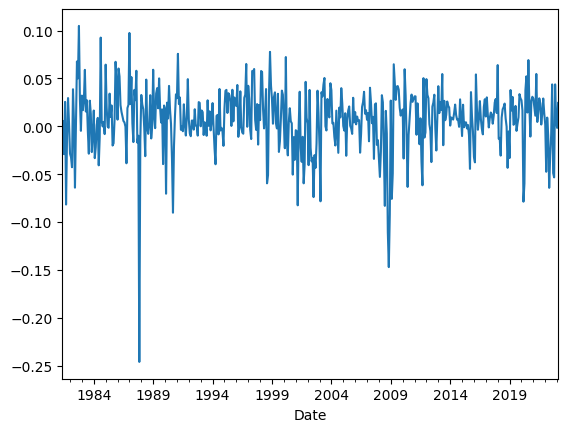

In [61]:
monthly_M2_SP['lnHigh_diff1'] = monthly_M2_SP['lnHigh']- monthly_M2_SP['lnHigh'].shift(1)
monthly_M2_SP.dropna(inplace=True)
monthly_M2_SP['lnHigh_diff1'].plot()

In [62]:
adf_test(monthly_M2_SP['lnHigh_diff1'])
kpss_test(monthly_M2_SP['lnHigh_diff1'])

Results of Dickey-Fuller Test:
Test Statistic                -1.723815e+01
p-value                        6.131502e-30
#Lags Used                     0.000000e+00
Number of Observations Used    5.010000e+02
Critical Value (1%)           -3.443470e+00
Critical Value (5%)           -2.867326e+00
Critical Value (10%)          -2.569852e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.107915
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Qba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Both tests 